<a href="https://colab.research.google.com/github/lourduradjou/Web-UI-Detection-YoloV8/blob/main/yoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi #used to check whether gpu is accesed or not, simple!

Fri Nov  1 08:35:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [51]:
from IPython.display import Image, display

In [ ]:
# Install the ultralytics package, which provides the YOLO model functionalities.
!pip install ultralytics

# Import the display module from IPython to manage output in the notebook.
from IPython import display

# Clear the output of the current cell in the notebook to keep the interface tidy.
display.clear_output()

# Check the configuration of the YOLO environment and installation.
# This command will verify if all necessary components are correctly set up.
!yolo mode=checks


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 765, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'export', 'val', 'benchmark', 'predict', 'train', 'track'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'segment', 'detect', 'classify', 'pose', 'obb'}
                MODE (required) is one of {'export', 'val', 'benchmark', 'predict', 'train', 'track'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:

!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/dog.jpg'

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/dog.jpg: 448x640 1 person, 1 dog, 41.7ms
Speed: 3.1ms preprocess, 41.7ms inference, 700.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


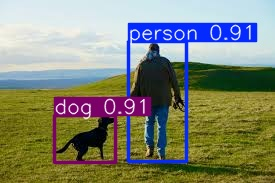

In [ ]:
Image(filename='runs/detect/predict2/dog.jpg', height=600)

In [ ]:
# python
from ultralytics import YOLO
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='/content/dog.jpg', conf=0.25)


image 1/1 /content/dog.jpg: 448x640 1 person, 1 dog, 42.7ms
Speed: 3.2ms preprocess, 42.7ms inference, 930.5ms postprocess per image at shape (1, 3, 448, 640)


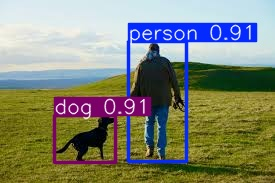

In [ ]:
Image(filename='runs/detect/predict/dog.jpg', height=600)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xxx")
project = rf.workspace("uibitz").project("dataset-v2")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset-v2-1 in yolov11:: 100%|██████████| 3042/3042 [00:00<00:00, 6581.78it/s]


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (you can use a specific model like yolov8s.pt)
model = YOLO('yolov8s.pt')
model.train(data='/content/dataset-v2-1/data.yaml', epochs=20, imgsz=640, batch=16)


100%|██████████| 21.5M/21.5M [00:00<00:00, 41.1MB/s]


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset-v2-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 4.67MB/s]


Overriding model.yaml nc=80 with nc=39

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 22.3MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset-v2-1/train/labels... 1314 images, 9 backgrounds, 0 corrupt: 100%|██████████| 1314/1314 [00:00<00:00, 1786.50it/s]

train: New cache created: /content/dataset-v2-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/dataset-v2-1/valid/labels... 121 images, 4 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<00:00, 1291.81it/s]

val: New cache created: /content/dataset-v2-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000233, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.11G      1.498      3.896       1.27         29        640: 100%|██████████| 83/83 [00:33<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        121       2339      0.443      0.176     0.0815     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.21G        1.1      2.317       1.09         44        640: 100%|██████████| 83/83 [00:29<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        121       2339      0.409      0.219      0.157      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.11G       1.02      2.025      1.046        116        640: 100%|██████████| 83/83 [00:31<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        121       2339       0.48      0.214      0.193      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.68G     0.9652      1.849      1.026         83        640: 100%|██████████| 83/83 [00:32<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        121       2339      0.317       0.31      0.204      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.44G     0.9352      1.726      1.015         50        640: 100%|██████████| 83/83 [00:27<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        121       2339      0.399      0.313       0.23       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.21G     0.9114      1.623      1.001         78        640: 100%|██████████| 83/83 [00:27<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        121       2339      0.412      0.311      0.239      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       5.1G     0.8936      1.556     0.9944         45        640: 100%|██████████| 83/83 [00:28<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        121       2339      0.373      0.323      0.244      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.05G     0.8657      1.463     0.9788         27        640: 100%|██████████| 83/83 [00:28<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        121       2339      0.335      0.341      0.248      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.16G     0.8566      1.406      0.978         34        640: 100%|██████████| 83/83 [00:29<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        121       2339      0.339      0.317      0.261      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.19G     0.8391       1.35     0.9686         83        640: 100%|██████████| 83/83 [00:29<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        121       2339      0.443      0.295      0.276       0.19


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.82G     0.8343      1.285     0.9642         12        640: 100%|██████████| 83/83 [00:31<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        121       2339      0.342      0.357      0.276      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.36G     0.8227      1.194     0.9578         48        640: 100%|██████████| 83/83 [00:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        121       2339      0.365      0.359      0.288      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.66G     0.8053      1.122     0.9512         20        640: 100%|██████████| 83/83 [00:26<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all        121       2339      0.367      0.382      0.298      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.48G     0.7905      1.073     0.9429         49        640: 100%|██████████| 83/83 [00:28<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        121       2339      0.414      0.345      0.296       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.85G     0.7781      1.012     0.9399         30        640: 100%|██████████| 83/83 [00:27<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        121       2339       0.39      0.348        0.3      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.13G     0.7705     0.9753     0.9369         21        640: 100%|██████████| 83/83 [00:26<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        121       2339      0.366      0.374       0.31       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.87G     0.7547     0.9417     0.9282         51        640: 100%|██████████| 83/83 [00:27<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        121       2339      0.393      0.383       0.31      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.76G     0.7499     0.9131     0.9273         19        640: 100%|██████████| 83/83 [00:28<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        121       2339      0.373      0.389      0.315      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.45G     0.7326      0.894     0.9212         60        640: 100%|██████████| 83/83 [00:26<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        121       2339      0.341      0.388      0.311      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.28G     0.7348      0.874     0.9186         79        640: 100%|██████████| 83/83 [00:26<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        121       2339      0.403      0.351      0.312      0.224



20 epochs completed in 0.176 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,140,677 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


                   all        121       2339      0.403      0.352      0.312      0.224
                   CTA        103        363      0.583      0.529      0.509      0.404
           Input field         60         71      0.515      0.746      0.547       0.39
                    ad         38         61      0.342      0.492      0.408      0.369
                 alert         11         11      0.235      0.455      0.405      0.325
                 badge         19         48      0.361      0.188      0.139     0.0921
                  card         19         57      0.335      0.456      0.276      0.264
              carousel         20         23      0.149       0.13      0.134       0.11
               content          3          5          0          0          0          0
                  copy         47         83       0.38      0.277      0.264      0.164
             data feed         19         26      0.381      0.231      0.239      0.182
            decoratio

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  6,  7,  8, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b9e85c46c80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,    

In [ ]:
val_results = model.val(data='/content/dataset-v2-1/data.yaml', conf=0.25)
print("Validation Results:", val_results)

# test_results = model.test(data='dataset/data.yaml')
# print("Test Results:", test_results)

# # Step 7: Test on specific images (optional)
# results = model.predict(source='dataset/test/images/image1.jpg', conf=0.25)
# print("Prediction Results:", results)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset-v2-1/valid/labels.cache... 121 images, 4 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]


                   all        121       2339      0.346      0.343      0.327      0.247
                   CTA        103        363      0.599      0.523      0.544       0.47
           Input field         60         71       0.53      0.746      0.553       0.41
                    ad         38         61      0.356      0.475      0.413      0.381
                 alert         11         11      0.251      0.455      0.387      0.341
                 badge         19         48      0.384      0.188      0.244      0.168
                  card         19         57      0.355      0.455      0.283      0.276
              carousel         20         23      0.151       0.13      0.126      0.114
               content          3          5          0          0          0          0
                  copy         47         83      0.396      0.269       0.31      0.219
             data feed         19         26      0.436      0.231       0.33      0.264
            decoratio

In [ ]:
predictions = model.predict(source='/content/dataset-v2-1/test/images/-LCG-LSG-www-52pojie-cn_tablet_png.rf.1e1d09299fbde00034f4b01c8e492fa5.jpg')

# Print the predictions (you can process these as needed)
print("Predictions:", predictions)



image 1/1 /content/dataset-v2-1/test/images/-LCG-LSG-www-52pojie-cn_tablet_png.rf.1e1d09299fbde00034f4b01c8e492fa5.jpg: 640x640 2 CTAs, 1 Input field, 1 ad, 3 data feeds, 3 dropdowns, 1 placeholder, 1 tag, 16.4ms
Speed: 3.2ms preprocess, 16.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Predictions: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'CAT', 1: 'CTA', 2: 'Input field', 3: 'QR code', 4: 'USP', 5: 'accordion', 6: 'ad', 7: 'alert', 8: 'badge', 9: 'bag', 10: 'breadcrumbs', 11: 'card', 12: 'carousel', 13: 'content', 14: 'copy', 15: 'data feed', 16: 'date picker', 17: 'decoration', 18: 'dropdown', 19: 'footer', 20: 'header', 21: 'heading', 22: 'hero image', 23: 'icon', 24: 'illustration', 25: 'image', 26: 'label', 27: 'logo', 28: 'navigation', 29: 'pagination', 30: 'placeholder', 31: 'pop-up', 32: 'progress bar', 33: 'slider', 34: 'tab', 35: 'tag', 36: 'title'

In [ ]:
predictions.show()

AttributeError: 'list' object has no attribute 'show'

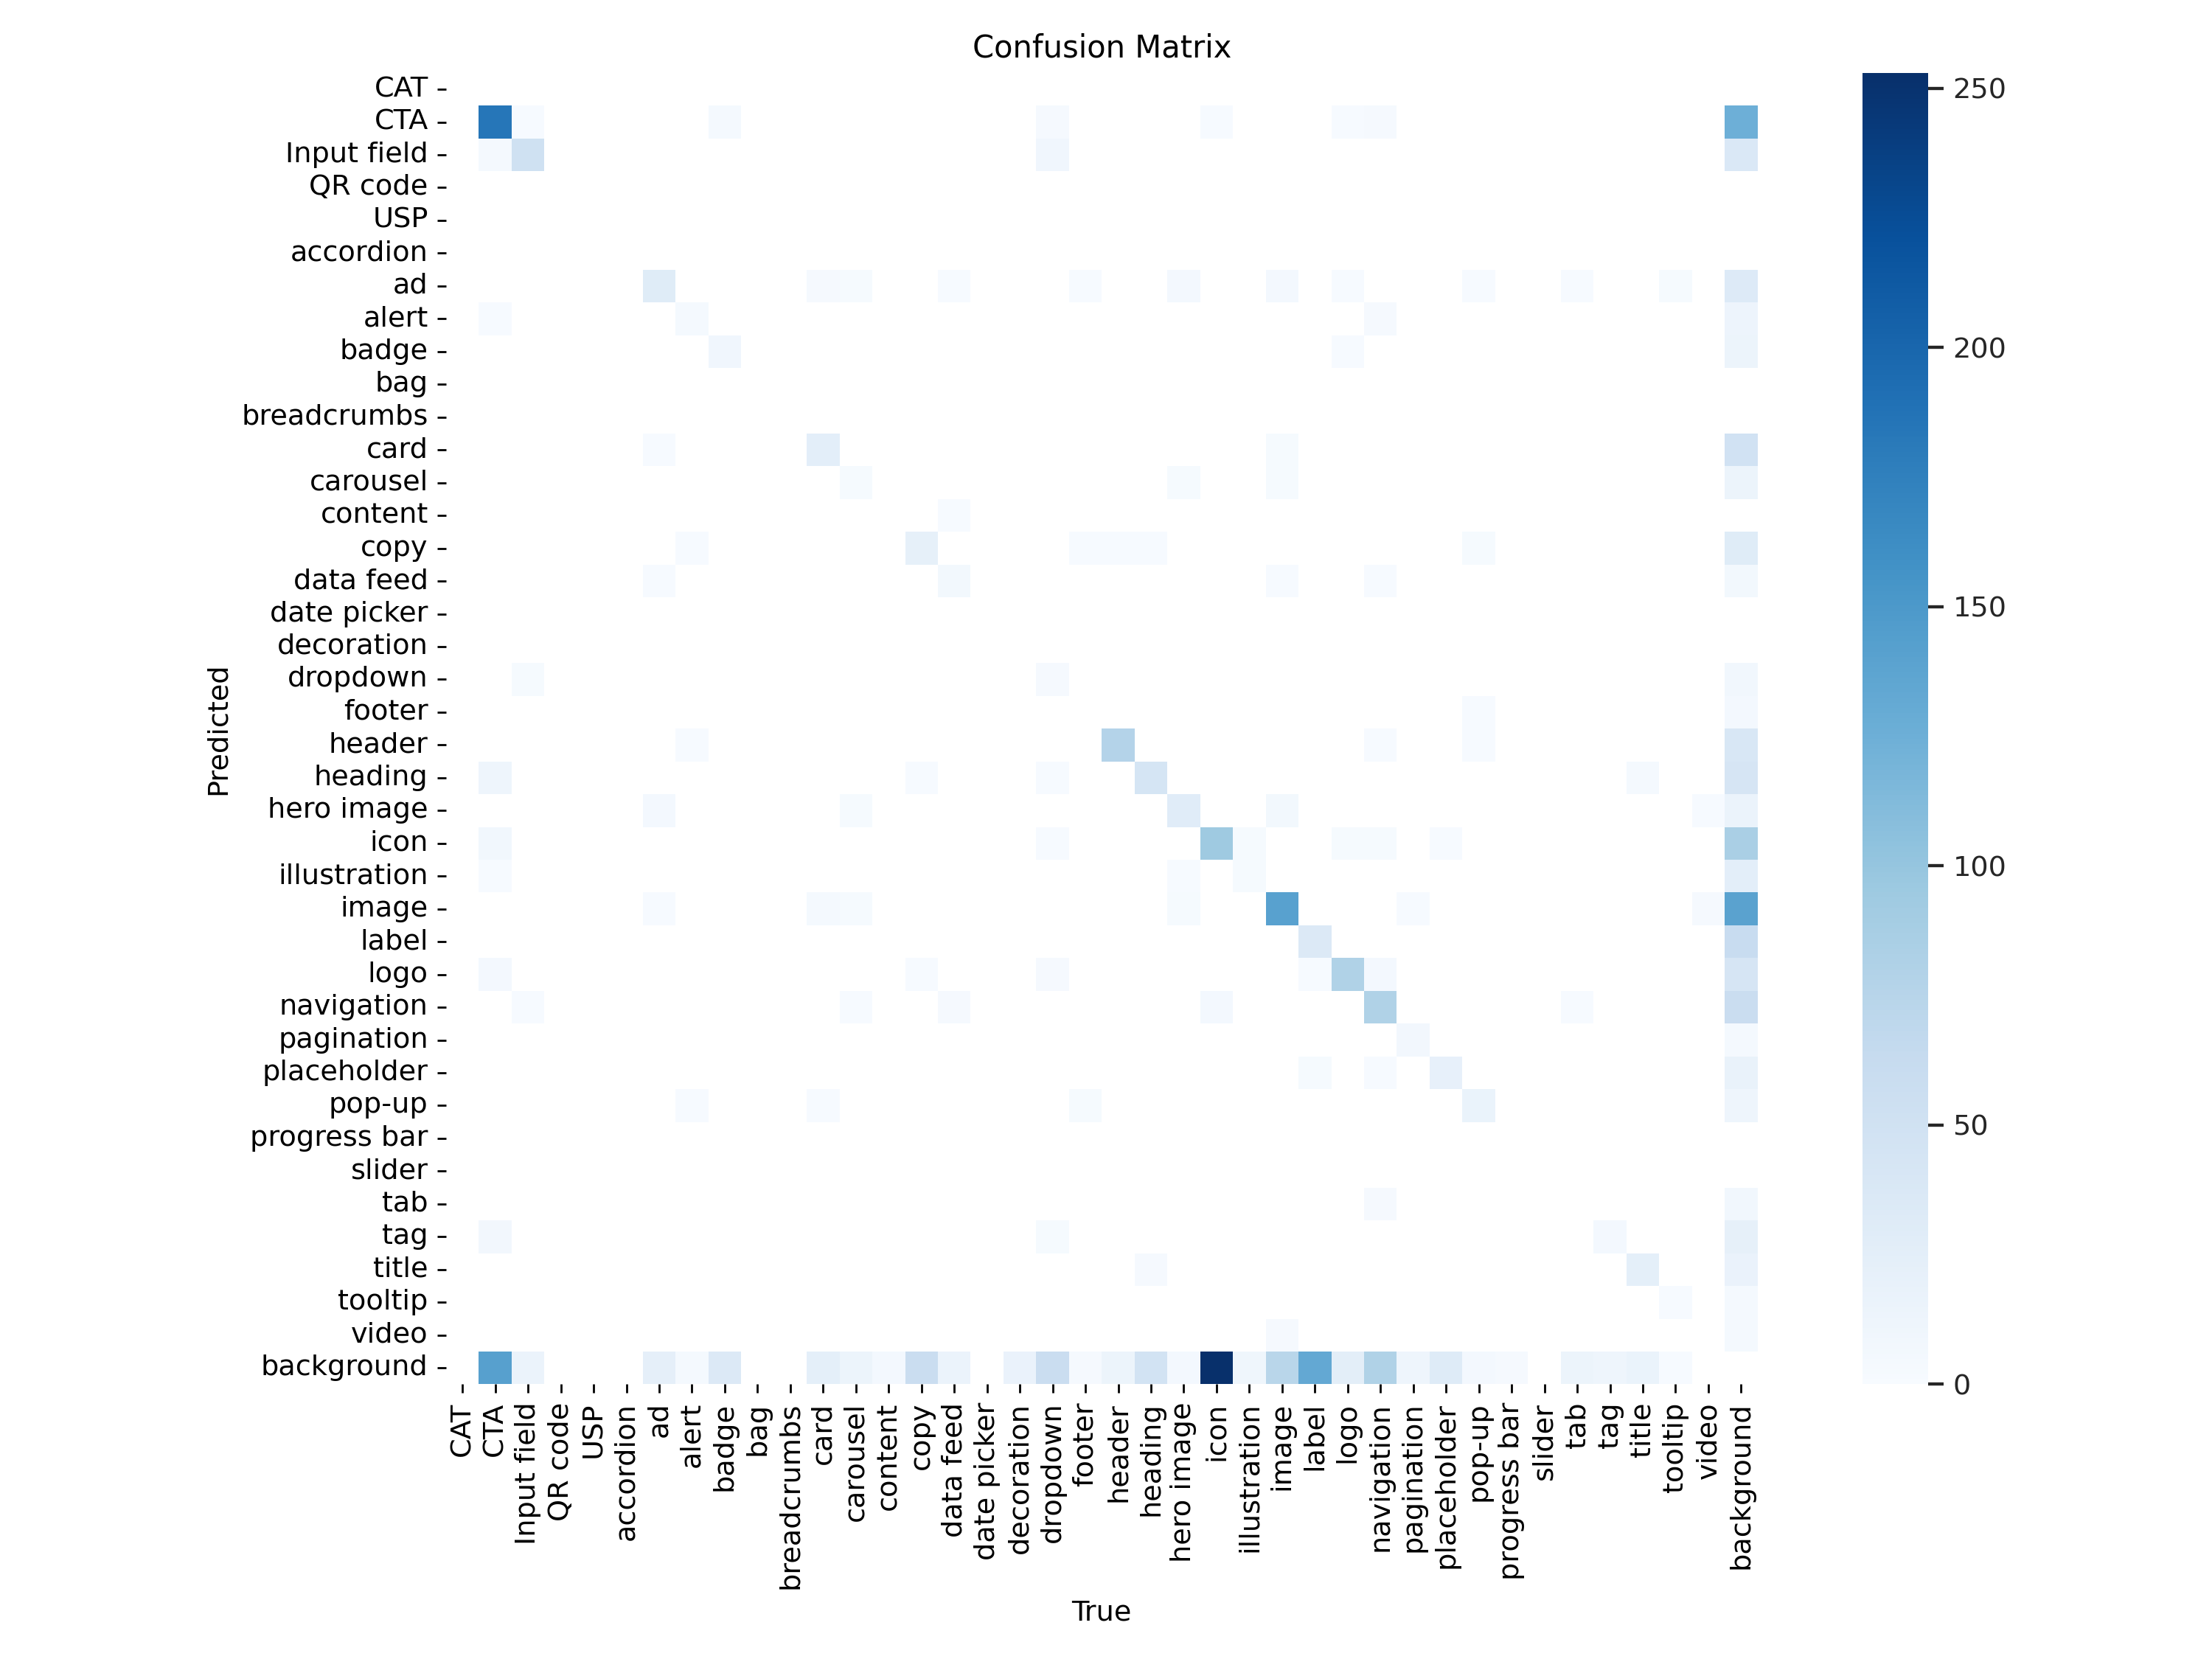

In [ ]:
Image(filename='/content/runs/detect/train3/confusion_matrix.png', height=600)


image 1/1 /content/dataset-v2-1/test/images/-_mobile_png.rf.09a0f41105591c662da22337f0fd6ca6.jpg: 640x640 2 CTAs, 1 header, 3 headings, 1 hero image, 1 icon, 2 images, 1 label, 1 navigation, 16.5ms
Speed: 2.8ms preprocess, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train5


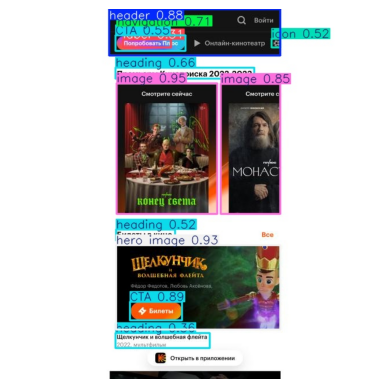

In [ ]:
results = model.predict(source="/content/dataset-v2-1/test/images/-_mobile_png.rf.09a0f41105591c662da22337f0fd6ca6.jpg", imgsz=640, conf=0.25, save=True)
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Load and display the saved prediction image
img = Image.open("/content/runs/detect/train4/-_mobile_png.rf.09a0f41105591c662da22337f0fd6ca6.jpg")  # Adjust path as needed
plt.imshow(img)
plt.axis("off")  # Turn off axis
plt.show()

In [ ]:
results = model.val(data='/content/dataset-v2-1/data.yaml', imgsz=640)  # Removed iou_thres
print(results)


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset-v2-1/test/labels... 80 images, 3 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 617.09it/s]

val: New cache created: /content/dataset-v2-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


                   all         80       1595      0.443      0.337      0.307      0.223
                   CTA         65        214      0.543      0.561      0.517      0.405
           Input field         32         37      0.545      0.676      0.525      0.406
                   USP          2          4          1          0          0          0
             accordion          1          1          1          0          0          0
                    ad         27         57      0.358      0.439      0.407       0.35
                 alert         11         11      0.191      0.388      0.225      0.115
                 badge         14         41      0.383      0.122      0.213      0.153
           breadcrumbs          2          2          1          0          0          0
                  card         12         47      0.409       0.66      0.561      0.548
              carousel          5          6     0.0683      0.167     0.0994     0.0915
               conten

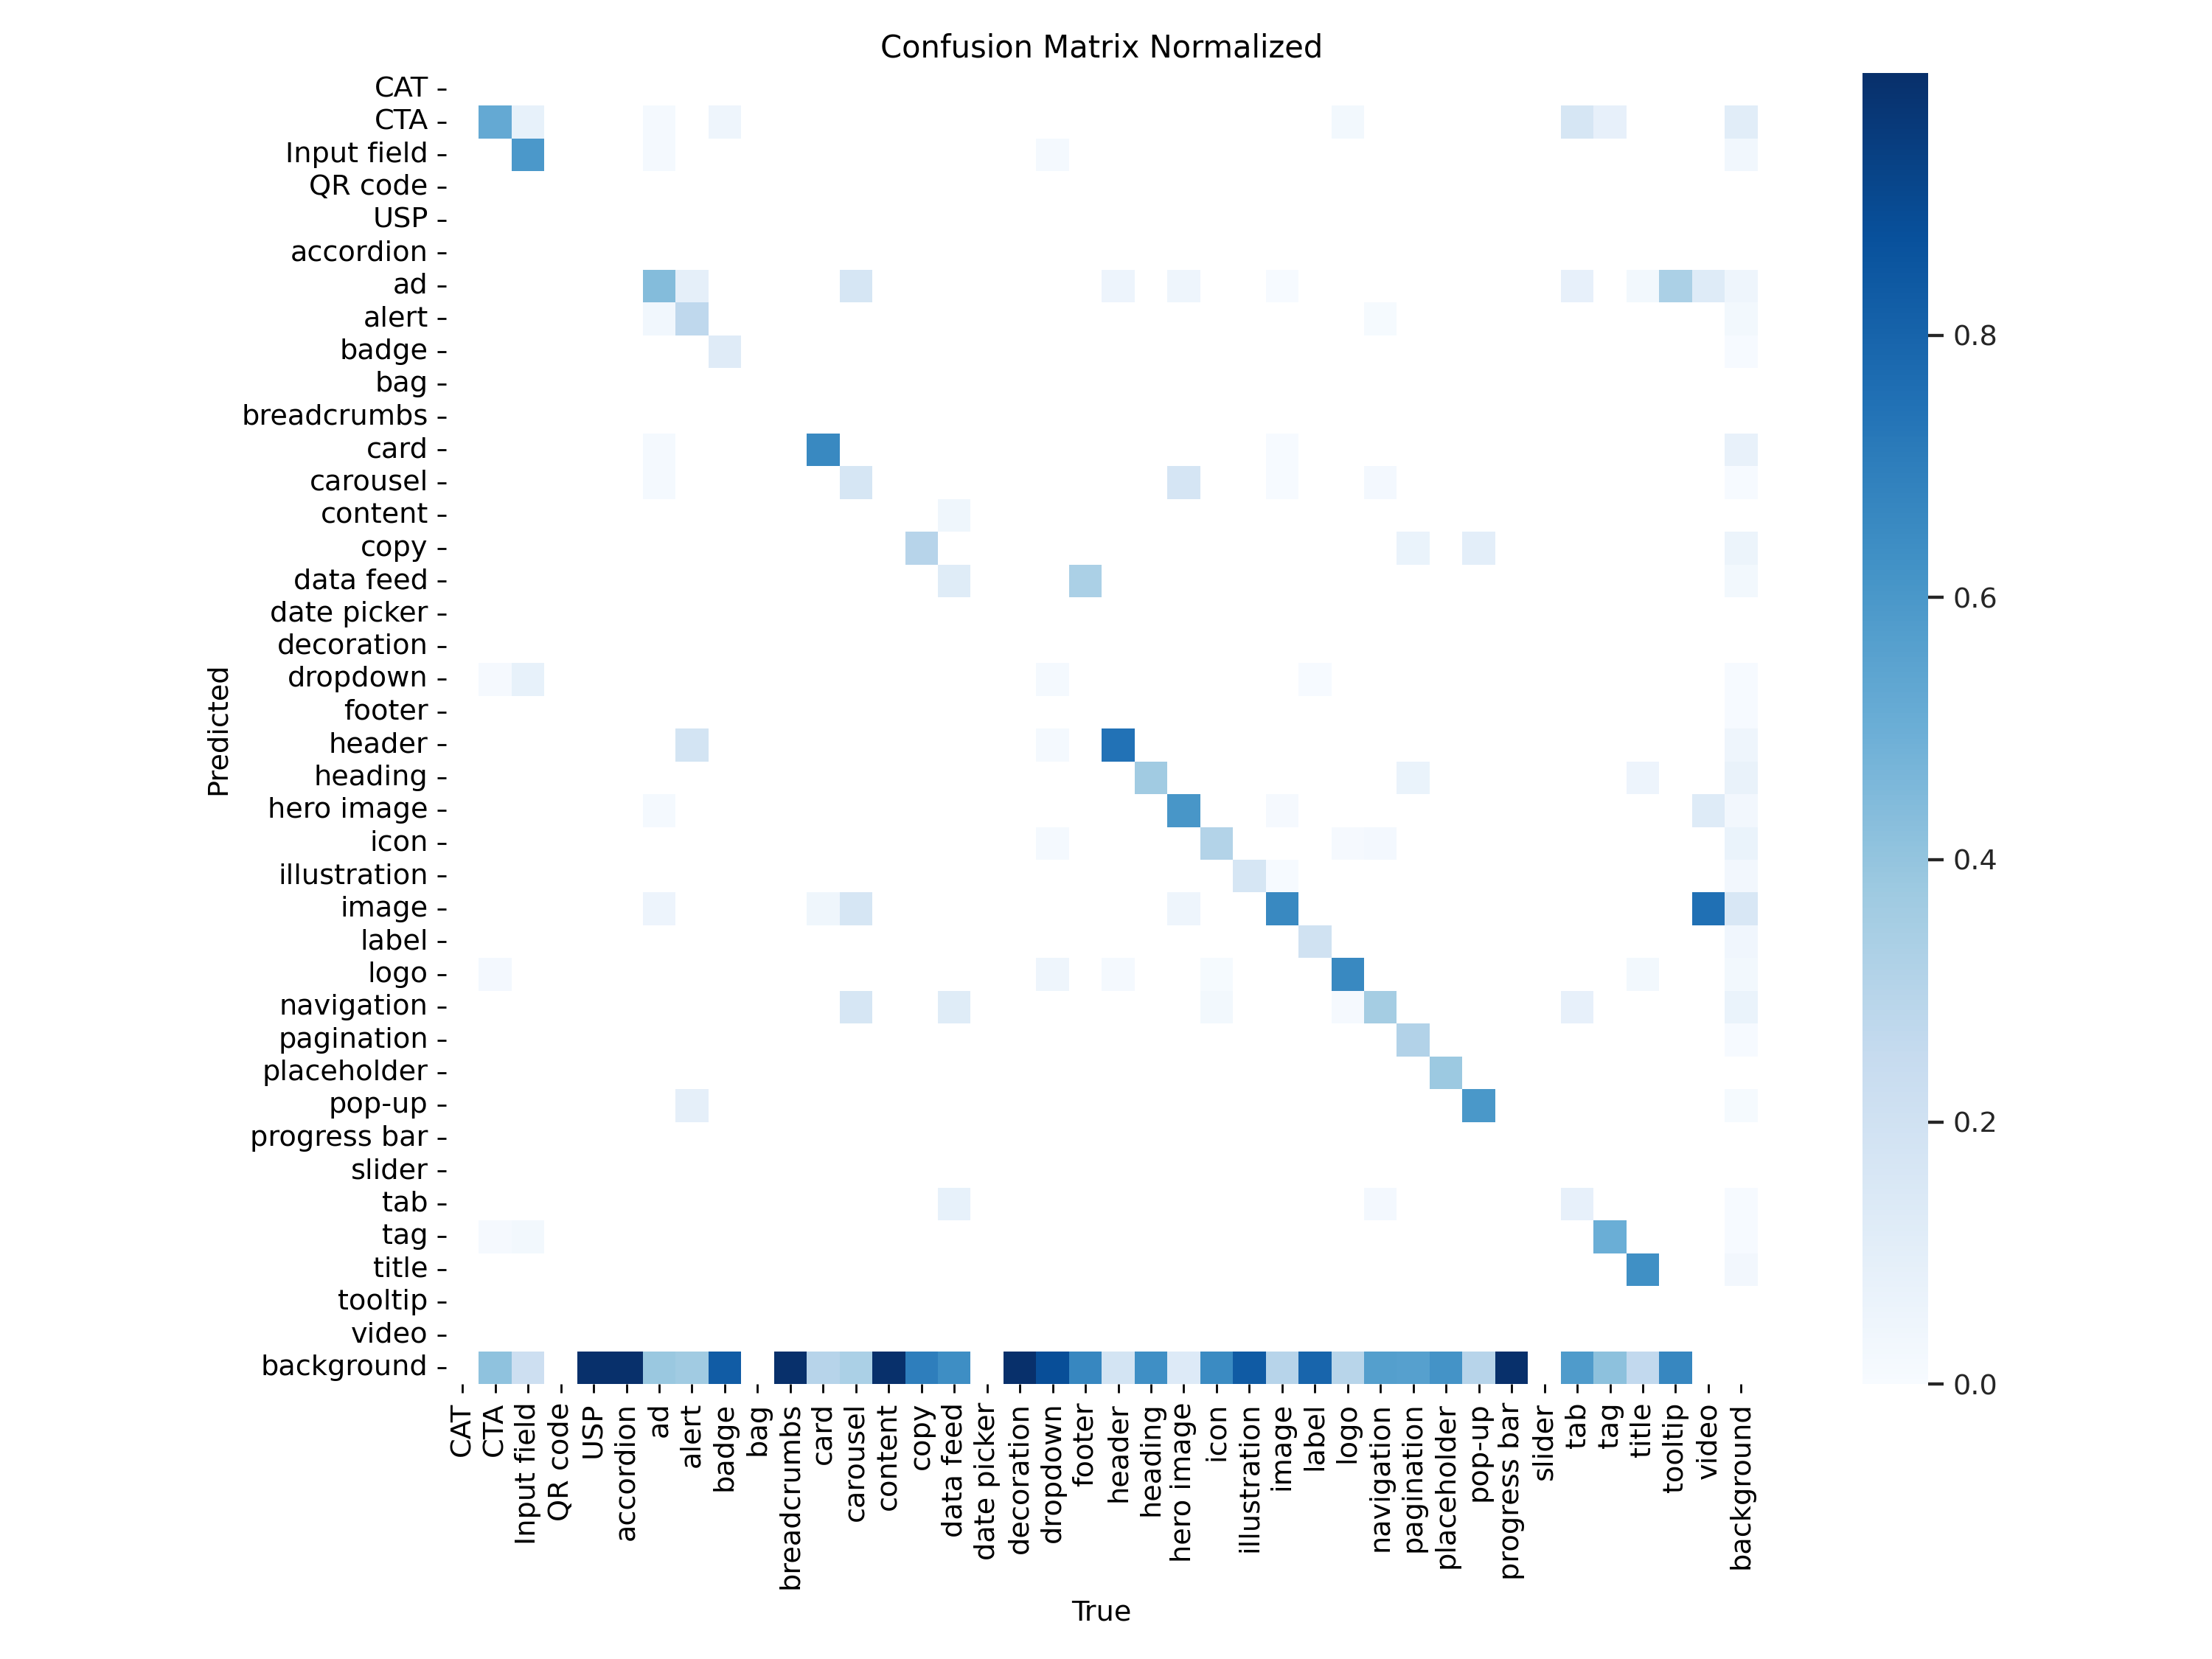

In [52]:
from IPython.display import Image, display
Image(filename='/content/runs/detect/train6/confusion_matrix_normalized.png', height=600)